In [2]:
#load the data and enrich with config information
import pandas as pd
import json
import matplotlib.pyplot as plt

#
df = pd.read_csv("./BatchTestResults_singleleftout.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df['Config File'] = df.index
df2 = pd.read_csv("./BatchTestResults_multiple_leftout.csv",encoding = "ISO-8859-1", skipinitialspace=True)
            
print(df[:10])

for i in df["Config File"]:
    with open('./configs/config_'+str(i)+'.json') as json_file:  
        data = json.load(json_file)
        df.at[i, 'backoff'] = data['Layers'][0]['Backoff']
        df.at[i, 'Condition'] = data['Layers'][0]['Condition']
        df.at[i, 'threshold'] = data['Layers'][0]['Threshold']
        df.at[i, 'threshold_float'] = data['Layers'][0]['ThresholdFloat']
        df.at[i, 'merger'] = data['Layers'][0]['Merger']
        df.at[i, 'splitter'] = data['Layers'][0]['Splitter']
        df.at[i, 'stepsize'] = data['Layers'][0]['Stepsize']
        df.at[i, 'Parallel Execution'] = data['Layers'][0]['ParallelExecutions']
        
        #take precision values from other test
        df.at[i, 'precisionAtL'] = df2.at[i, 'precisionAtL']
        df.at[i, 'precision'] = df2.at[i, 'precision']
        
        if df.at[i, 'Condition'] == "tooUnlikelyRecommendationsCondition":
            df.at[i, 'Condition'] = "tooUnlikelyRecommendations"
        
        if df.at[i, 'backoff'] == 'splitProperty':
            df.at[i, 'Parallel Execution'] = 2
            df.at[i, 'Description'] = "Split Property (" +  df.at[i, 'splitter'] + " "+ df.at[i, 'merger']+")"
        if df.at[i, 'backoff'] == 'deleteLowFrequency':
             df.at[i, 'Description'] ="Delete Low Frequency ("+df.at[i, 'stepsize']+")"
                
df['Parallel Execution'] = df['Parallel Execution'].astype(int)


df.describe

   Config File  subjects  duration      mean  meanOfHits  median     stddev  \
0            0    316841    4.9625  135.8816      3.3037     1.0  1143.7039   
1            1    316817    6.0777   43.6952      4.0986     1.0   628.4239   
2            2    316786    4.8793  135.8683      3.2349     1.0  1143.9431   
3            3    316743    6.0310   43.7961      4.0640     2.0   629.4922   
4            4    316792    4.8650  281.7020      3.1203     2.5  1645.4858   
5            5    316744    5.4848   66.1586      3.8611     1.0   787.0421   
6            6    316813    4.9911  236.4198      3.2023     1.0  1509.0846   
7            7    316771    5.6096   73.5226      3.5601     1.0   833.5917   
8            8    316813    5.3269  220.7009      3.2296     1.0  1458.4256   
9            9    316743    5.7996   87.3761      3.4570     1.0   912.2378   

      top1     top5    top10     topL   recall  precision  precisionAtL  
0  80.9520  91.6722  94.2690  80.9520  98.6738     0.511

<bound method NDFrame.describe of     Config File  subjects  duration      mean  meanOfHits  median     stddev  \
0             0    316841    4.9625  135.8816      3.3037     1.0  1143.7039   
1             1    316817    6.0777   43.6952      4.0986     1.0   628.4239   
2             2    316786    4.8793  135.8683      3.2349     1.0  1143.9431   
3             3    316743    6.0310   43.7961      4.0640     2.0   629.4922   
4             4    316792    4.8650  281.7020      3.1203     2.5  1645.4858   
5             5    316744    5.4848   66.1586      3.8611     1.0   787.0421   
6             6    316813    4.9911  236.4198      3.2023     1.0  1509.0846   
7             7    316771    5.6096   73.5226      3.5601     1.0   833.5917   
8             8    316813    5.3269  220.7009      3.2296     1.0  1458.4256   
9             9    316743    5.7996   87.3761      3.4570     1.0   912.2378   
10           10    316783    5.8901  195.1929      3.2629     1.0  1371.9044   
11    

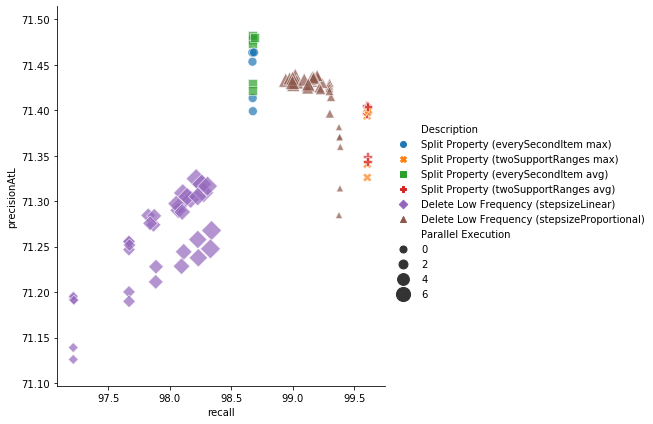

<Figure size 1080x1800 with 0 Axes>

<Figure size 432x288 with 0 Axes>

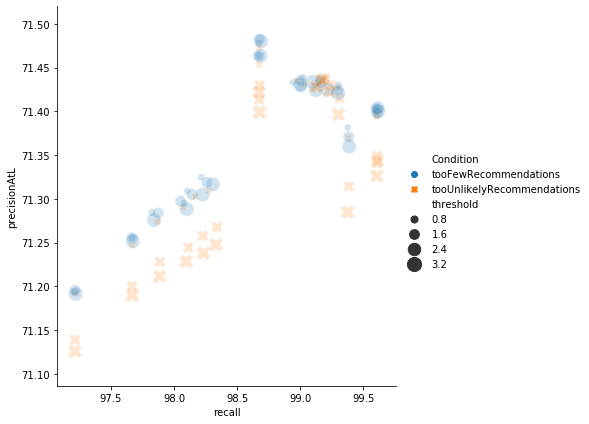

<Figure size 1080x1800 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
# seaborn visualization
import seaborn as sns

g = sns.relplot(x="recall", y="precisionAtL", hue="Description",style ="Description", size="Parallel Execution",
            sizes=(50, 200), alpha=.7,
            height=6, data=df)

#leg = g._legend
#leg.set_bbox_to_anchor([0.30,0.0])  # coordinates of lower left of bounding box
#leg._loc=8
#plt.subplots_adjust(bottom=0.5, right=0.6)
plt.figure(figsize=(15,25))
plt.show()
plt.savefig("condition_comp", dpi=300)

g = sns.relplot(x="recall", y="precisionAtL", hue="Condition", style="Condition", size="threshold",
            sizes=(50, 200), alpha=.2,
            height=6, data=df)

#leg = g._legend
#leg.set_bbox_to_anchor([0.7,0.3])  # coordinates of lower left of bounding box

#leg._loc=3
#plt.subplots_adjust(bottom=0, right=0.1)
plt.figure(figsize=(15,25))
plt.show()
plt.savefig("condition_comp", dpi=300)
    